In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
#url variables
politician_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/politician-trading-data/politician-trading-data-csv/politician-trading-data-BUY2020-final.csv"

#download csv
pol_download = requests.get(politician_data_csv_url).content

In [3]:
#read file to data frame
pol_df = pd.read_csv(io.StringIO(pol_download.decode('utf-8')))

In [4]:
#Drop NA from 12
pol_df = pol_df[pol_df.PERCENT_CHANGE_12_MONTH != '#DIV/0!']
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_12_MONTH'])
pol_df.head()

,REP_FULLNAME,REP_STATE,REP_TYPE,REP_PARTY,COMPANY_TICKER,COMPANY_CODE,COMPANY_COUNTRY,COMPANY_NAME,TRANSACTION_TYPE,TRANSACTION_DATE,TRANSACTION_PRICE,SHARE_TYPE,TRANSACTION_SHARE_PRICE,TRANSACTION_SHARE_QUANTITY,SHARE_PRICE_3_MONTH,SHARE_PRICE_6_MONTH,SHARE_PRICE_1_YEAR,PERCENT_CHANGE_3_MONTH,PERCENT_CHANGE_6_MONTH,PERCENT_CHANGE_12_MONTH
333,Alan Lowenthal,CA,Congress,Democratic,BABA,9988 HK,HK,Alibaba Group Holding Ltd,Buy,11/30/2020,8000,Ord,263.36,30,241.69,219.48,127.53,-8.23,-16.66,-51.58
334,David Roe,TN,Congress,Republican,CCOI,CCOI US,US,Cogent Communications Holdings Inc,Buy,11/30/2020,8000,Com,58.14,136,60.32,74.81,74.93,3.75,28.67,28.88
335,David Roe,TN,Congress,Republican,CSCO,CSCO US,US,Cisco Systems Inc,Buy,11/30/2020,8000,Com,43.02,184,45.92,52.62,54.84,6.74,22.32,27.48
336,David Roe,TN,Congress,Republican,DDOG,DDOG US,US,Datadog Inc,Buy,11/30/2020,8000,Com A,98.92,80,97.61,91.88,178.29,-1.32,-7.12,80.24
337,Douglas Lamborn,CO,Congress,Republican,NTAP,NTAP US,US,NetApp Inc,Buy,11/30/2020,16001,Com NPV,53.31,300,65.23,76.71,88.88,22.36,43.89,66.72


In [5]:
#create a dataframe where party = republican
pol_df = pol_df.loc[pol_df["REP_PARTY"] == "Democratic"]

In [6]:
#group by % change 12 month
pol_df['PERCENT_CHANGE_12_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_12_MONTH'], downcast="integer")
pol_df['TRANSACTION_SHARE_PRICE'] = pd.to_numeric(pol_df['TRANSACTION_PRICE'], downcast="integer")
pol_df = pol_df.groupby(['REP_FULLNAME']).agg({"TRANSACTION_PRICE": "sum", "PERCENT_CHANGE_12_MONTH":"mean"}).reset_index()
pol_df.head()

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_12_MONTH
0,Alan Lowenthal,1081665,74.298488
1,Brian Higgins,32500,79.530000
2,Cheryl Bustos,32500,66.090000
3,Cynthia Axne,256011,26.118889
4,Daniel Lipinski,415501,12.263333


In [7]:
#create a column titled dollar return that takes the summed transaction costs multipled by the % returns
pol_df["DECIMAL_CHANGE_2020"] = (pol_df.PERCENT_CHANGE_12_MONTH/100)
pol_df["NOMINAL_GAINS_2020"] = pol_df.TRANSACTION_PRICE * pol_df["DECIMAL_CHANGE_2020"]
pol_df.head()

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_12_MONTH,DECIMAL_CHANGE_2020,NOMINAL_GAINS_2020
0,Alan Lowenthal,1081665,74.298488,0.742985,803660.744250
1,Brian Higgins,32500,79.530000,0.795300,25847.250000
2,Cheryl Bustos,32500,66.090000,0.660900,21479.250000
3,Cynthia Axne,256011,26.118889,0.261189,66867.228633
4,Daniel Lipinski,415501,12.263333,0.122633,50954.272633


In [8]:
#sort by top 10
pol_df = pol_df.sort_values(by=['NOMINAL_GAINS_2020'], ascending=False)
pol_df = pol_df.head(10)
pol_df

,REP_FULLNAME,TRANSACTION_PRICE,PERCENT_CHANGE_12_MONTH,DECIMAL_CHANGE_2020,NOMINAL_GAINS_2020
34,Rohit Khanna,18402312,44.645020,0.446450,8.215716e+06
39,Suzan Delbene,15774000,37.170000,0.371700,5.863196e+06
35,Ronald Wyden,6769003,52.201013,0.522010,3.533488e+06
17,Gilbert Cisneros,4008501,64.203528,0.642035,2.573599e+06
29,Nancy Pelosi,1500000,65.420000,0.654200,9.813000e+05
7,Dean Phillips,1705501,55.888128,0.558881,9.531726e+05
0,Alan Lowenthal,1081665,74.298488,0.742985,8.036607e+05
42,Thomas Suozzi,1555500,49.725147,0.497251,7.734747e+05
24,Joshua Gottheimer,1590000,45.589360,0.455894,7.248708e+05
38,Susie Lee,1280500,47.865287,0.478653,6.129150e+05


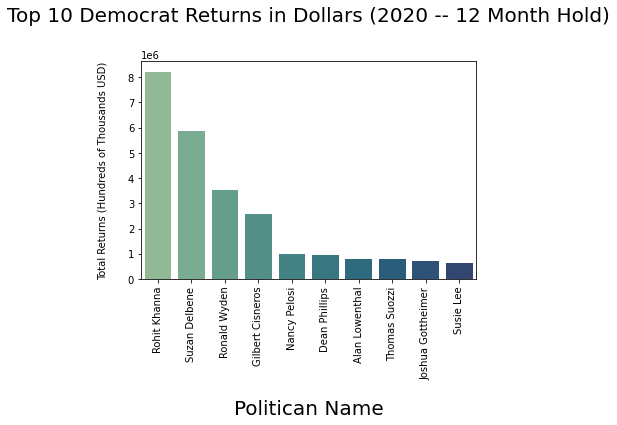

In [9]:
#graph the bar chart
palette = sns.color_palette("crest",10)
ax=sns.barplot(x=pol_df["REP_FULLNAME"], y=pol_df["NOMINAL_GAINS_2020"],palette=palette)
ax.set_xlabel("Politican Name",fontsize=20,labelpad=20)
ax.set_ylabel("Total Returns (Hundreds of Thousands USD)",fontsize=10,labelpad=20)
ax.set_title("Top 10 Democrat Returns in Dollars (2020 -- 12 Month Hold)", fontsize=20, pad=40)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=10)
plt.savefig('bfb_visualization_5_TWELVE_DEM_bar')